# Logistic Regression and Support Vector Machine 

## Import and Prepare the Data 

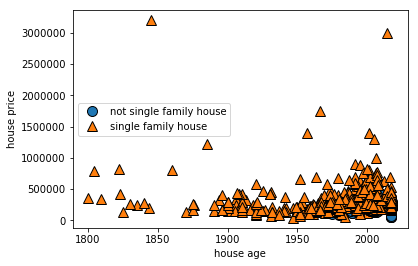

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn

df = pandas.read_excel('house_price_label.xlsx')

# combine multiple columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
y = df.is_single
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(['not single family house','single family house'])
plt.xlabel('house age')
plt.ylabel('house price')
plt.show()

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
logreg = LogisticRegression().fit(X,y)
y_predict = logreg.predict(X)

print ("Training Set Accuracy: {:.3f}".format(logreg.score(X, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.765
Training Set Kappa: 0.078


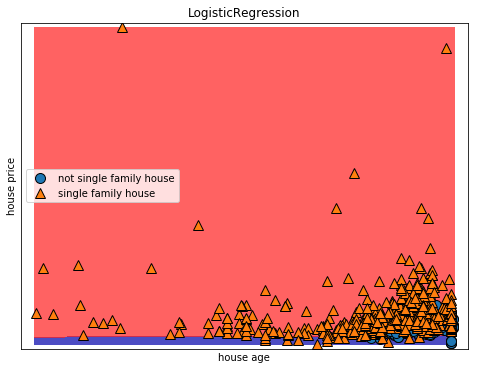

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
mglearn.plots.plot_2d_separator(logreg, X, fill=True, eps=0.5,ax=ax, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
plt.title("{}".format(logreg.__class__.__name__))
plt.xlabel("house age")
plt.ylabel("house price")
plt.legend(['not single family house','single family house'])

Training accuracy of l1 logreg with C=1.00: 0.77
Training kappa: 0.087
Training accuracy of l1 logreg with C=100.00: 0.77
Training kappa: 0.109
Training accuracy of l1 logreg with C=10000.00: 0.77
Training kappa: 0.109


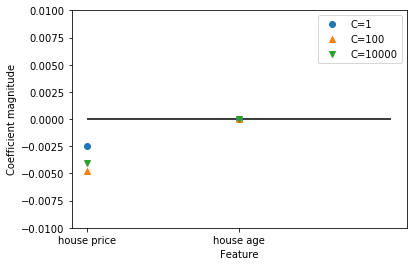

In [6]:
for C, marker in zip([1, 100, 10000], ['o', '^', 'v']): # use different C parameters
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X, y) # select l1 regularization
    print("Training accuracy of l1 logreg with C={:.2f}: {:.2f}".format(C, lr_l1.score(X, y)))
    print ("Training kappa: {:.3f}".format(cohen_kappa_score(y,lr_l1.predict(X))))
    plt.plot(lr_l1.coef_.T, marker, label="C={}".format(C))

plt.xticks(range(X.shape[1]), ['house price','house age'])
plt.hlines(0, 0,X.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-0.01, 0.01)
plt.legend()

## Linear Support Vector Machine

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import cohen_kappa_score
linear_svm = LinearSVC().fit(X,y)
y_predict = linear_svm.predict(X)

print ("Training Set Accuracy: {:.3f}".format(linear_svm.score(X, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.773
Training Set Kappa: 0.035


In [8]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
linear_svm = LinearSVC().fit(X_scaled,y)
y_predict = linear_svm.predict(X_scaled)

print ("Training Set Accuracy: {:.3f}".format(linear_svm.score(X_scaled, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.798
Training Set Kappa: 0.402


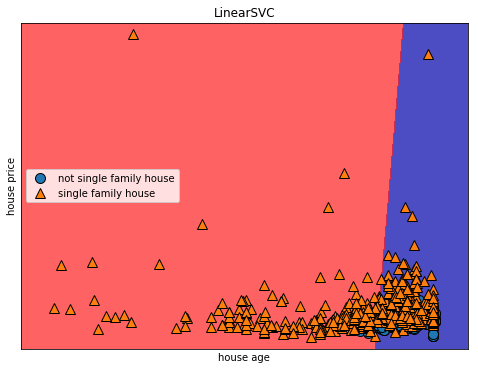

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
mglearn.plots.plot_2d_separator(linear_svm, X_scaled, fill=True, eps=0.5,ax=ax, alpha=.7)
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], y, ax=ax)
plt.title("{}".format(linear_svm.__class__.__name__))
plt.xlabel("house age")
plt.ylabel("house price")
plt.legend(['not single family house','single family house'])

## Kernalized Support Vector Machine

In [11]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score

X_scaled = preprocessing.scale(X)
kernel_svm = SVC(kernel='rbf', C=10, gamma=10).fit(X_scaled, y)
y_predict = kernel_svm.predict(X_scaled)

print ("Training Set Accuracy: {:.3f}".format(kernel_svm.score(X_scaled, y)))
print ("Training Set Kappa: {:.3f}".format(cohen_kappa_score(y,y_predict)))

Training Set Accuracy: 0.875
Training Set Kappa: 0.649


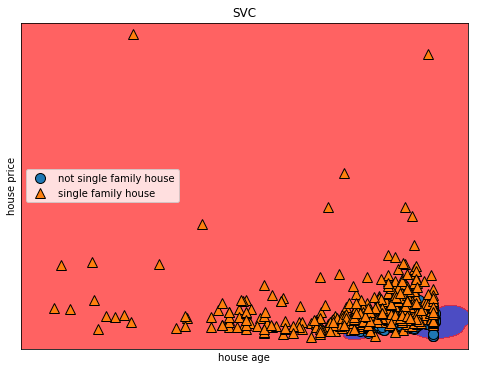

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
mglearn.plots.plot_2d_separator(kernel_svm, X_scaled, fill=True, eps=0.5,ax=ax, alpha=.7)
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], y, ax=ax)


plt.title("{}".format(kernel_svm.__class__.__name__))
plt.xlabel("house age")
plt.ylabel("house price")
plt.legend(['not single family house','single family house'])

In [13]:
for C, marker in zip([10, 100, 1000], ['o', '^', 'v']): # use different C parameters
    for gamma in [10,100,1000]:
        kernel_svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_scaled, y)
        print ('-----')
        print("Kernel svm with C={:.2f}, gama={:.2f}".format(C,gamma))
        print("Accuracy: {:.2f}".format( kernel_svm.score(X_scaled, y)))
        print ("Kappa: {:.3f}".format(cohen_kappa_score(y,kernel_svm.predict(X_scaled))))

-----
Kernel svm with C=10.00, gama=10.00
Accuracy: 0.88
Kappa: 0.649
-----
Kernel svm with C=10.00, gama=100.00
Accuracy: 0.94
Kappa: 0.829
-----
Kernel svm with C=10.00, gama=1000.00
Accuracy: 0.97
Kappa: 0.914
-----
Kernel svm with C=100.00, gama=10.00
Accuracy: 0.91
Kappa: 0.744
-----
Kernel svm with C=100.00, gama=100.00
Accuracy: 0.95
Kappa: 0.866
-----
Kernel svm with C=100.00, gama=1000.00
Accuracy: 0.98
Kappa: 0.941
-----
Kernel svm with C=1000.00, gama=10.00
Accuracy: 0.91
Kappa: 0.756
-----
Kernel svm with C=1000.00, gama=100.00
Accuracy: 0.96
Kappa: 0.890
-----
Kernel svm with C=1000.00, gama=1000.00
Accuracy: 0.98
Kappa: 0.955
